## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from matplotlib.pyplot import figure


To have a dataset or set of data points, the student must generate a pair of arrays X and y with the values in X equally distributed between 0 and 20 and the values in y such that: yi = a*xi + b (and a = -2, b = 1)

In [2]:
# To generate squence data
# x = np.linspace(0, 20, 20)
# x = x.astype(int)
# print ("list is : " +  str(x))
# print(len(x))

# To generate random 
X = random.sample(range(0, 20), 20)
 
print ("Random number list is : " +  str(X))
print(len(X))

# convert x from list to numpy array

X = np.array(X)
print(type(X))


Random number list is : [4, 1, 15, 8, 6, 18, 0, 13, 17, 14, 2, 10, 5, 7, 3, 16, 9, 19, 12, 11]
20
<class 'numpy.ndarray'>


In [3]:
# generate Y from equation yi = a*xi + b (and a = -2, b = 1)
Y = -2*X + 1
print(Y)

[ -7  -1 -29 -15 -11 -35   1 -25 -33 -27  -3 -19  -9 -13  -5 -31 -17 -37
 -23 -21]


## Plot Original Data

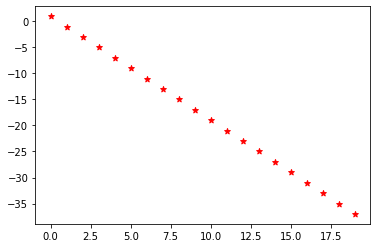

In [4]:

plt.scatter(X,Y, marker='*', c="red")
plt.show()

Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
The function should take the following input parameters:
Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
The function should return the following:
All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
Note: you can choose any suitable stop criteria

## Batch Gradient Descent

In [5]:
x = np.column_stack((np.ones(len(X), dtype=int),X))
print(x.shape)
print(len(x))
y = Y.reshape(-1,1)

(20, 2)
20


In [6]:
def Batch_GD(x, y, max_iteration, alpha, stop_critia):

  # lists to return it
  loss_fun = []
  theta0 = []
  theta1= []
  all_y_predict = []

  # number of observation
  m = x.shape[0]
  # Create theta matrix of size x.shape[1]X1
  thetas = np.zeros((x.shape[1], 1))

  count = 0
  for i in range(max_iteration):
    count+= 1
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_old = (1/(2*m))*np.sum((y_predict - y)**2)

    # calculate Gradient descent
    Grad = (1/m)*np.transpose(x) @ (y_predict - y)         # x shape (20, 2), y shape (20,1) , so x must be transpose after product y

    thetas = thetas - alpha*Grad

    # Update y_predict && cost function After Gradient
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_new = (1/(2*m))*np.sum((y_predict - y)**2)

    loss_fun.append(cost_function_new)
    theta0.append(thetas[0])
    theta1.append(thetas[1])
    all_y_predict.append(y_predict)

    ## cases for stop iterations
    if abs(cost_function_new - cost_function_old) < stop_critia:         #  stop critical cost function (stop when it doesn't decrease with iteration)
       print(f"Convergence occure at {count} iterations")
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun
    
    if (np.linalg.norm(Grad, 2))< 0.01:                                     # stop critical Gradient (check if the algorithm reached the minimum )
       print(f'reached to minimum point at {count} iterations')
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun

  return y_predict , all_y_predict , thetas, theta0, theta1, loss_fun


#### Try your function with any input parameterss of your choice.

In [7]:
y_predict , all_y_predict , thetas, theta0, theta1, loss_fun = Batch_GD(x, y, 1000, 0.0001, 0.001)
 

Convergence occure at 347 iterations


#### Calculate r2 score

In [8]:
###### to evaluate the performance (measure accuracy) of model use r2_score

from sklearn.metrics import r2_score
score = r2_score(y, y_predict)
print(f"the accuracy of model is = {score}")

the accuracy of model is = 0.9967981404881295


#### Plot loss vs. epochs

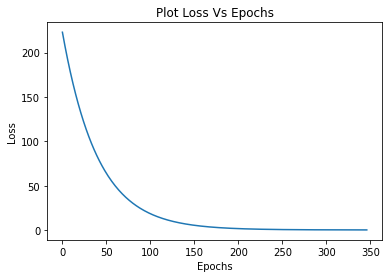

In [9]:
plt.plot(loss_fun )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()



```
# This is formatted as code
```

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

347
347


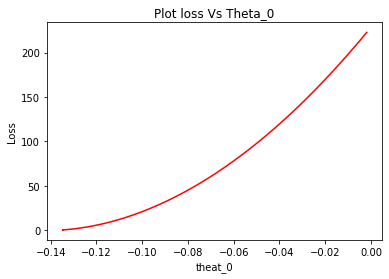

In [10]:
print(len(theta0))
print(len(loss_fun))
plt.plot(theta0, loss_fun, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0")
plt.show()

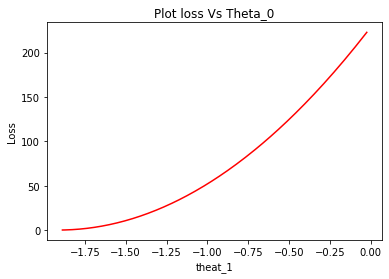

In [11]:
plt.plot(theta1, loss_fun, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0")
plt.show()

#### Plot all regression lines till converge

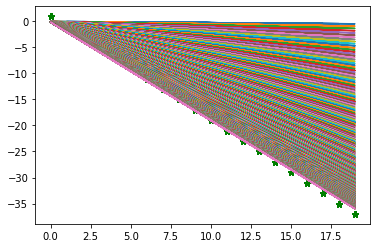

In [12]:

for predict in all_y_predict:
  plt.scatter(X, y, marker='*', c= 'green') 
  plt.plot(X, predict)

plt.show()

### Plot The Best Regression Line

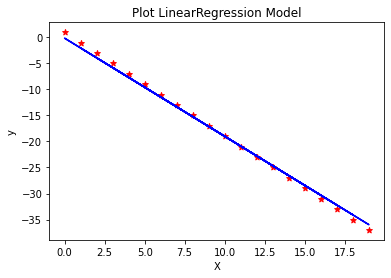

In [13]:
plt.scatter(X,y, marker = '*',color = 'red')
plt.plot(X,y_predict , color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression Model")
plt.show()

## Mini_batch Gradient descent

In [14]:
def Mini_Batch(x, y , max_iteration, num_batchs, alpha, stop_criteria):
  loss_fun_batch = []
  loss_fun = []
  theta_list_0 = []
  theta_list_1 = []
  y_predict_list_iteration = []
  
  m= len(x)
  n_Rows_Batch=int(m/num_batchs)
  thetas=np.zeros((x.shape[1],1))
  count=0
  for i in range(max_iteration):
    count+= 1
    for i in range(0,m,n_Rows_Batch):         # for loop from 0 to 20,  but step= 4 not 1 , beacuse 4 (represent number of row in each batch) 
            yPredict= x[i:i + n_Rows_Batch]@thetas
            # print(x)
            # print(x[i:i + n_Rows_Batch])
            cost_fun_old= (1/(2*n_Rows_Batch))* np.sum((yPredict-y[i:i+ n_Rows_Batch])**2)    
            
            Grad= (np.transpose(x[i:i+n_Rows_Batch])@(yPredict-y[i:i+n_Rows_Batch]))/ n_Rows_Batch

            thetas= thetas - (alpha*Grad)
             
            theta_list_0.append(thetas[0])
            theta_list_1.append(thetas[1])
            
            yPredict= x[i:i+n_Rows_Batch]@thetas
            cost_fun_new =  (1/(2*n_Rows_Batch))* np.sum((yPredict-y[i:i+ n_Rows_Batch])**2)
            loss_fun_batch.append(cost_fun_new)

    YP_Total= x @ thetas  # After end pass all batch in one iteration , calcualte y_predict for 1 epoch  
    loss_fun.append(cost_fun_new)
    y_predict_list_iteration.append(YP_Total)

    if abs(cost_fun_old - cost_fun_new) < stop_criteria:
            print(f"Convergence occure at {count} iterations")
            return y_predict, loss_fun , theta_list_0 , theta_list_1 , loss_fun_batch, y_predict_list_iteration 

    
  
  return   y_predict, loss_fun , theta_list_0, theta_list_1 , loss_fun_batch, y_predict_list_iteration          


In [15]:
yp, loss_fun , theta0 , theta1 , loss_fun_batch, y_predict_list_iteration  = Mini_Batch(x, y, 1000, 5, 0.0001, 0.001)
 

Convergence occure at 82 iterations


### R2 Score

In [16]:
from sklearn.metrics import r2_score
score = r2_score(y, yp)
print(f"the accuracy of model is = {score}")

the accuracy of model is = 0.9967981404881295


##  Plot loss vs. epochs

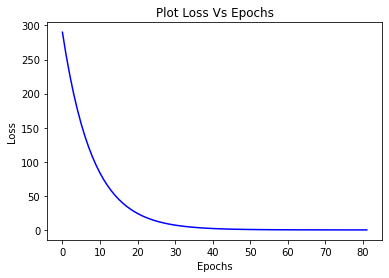

In [17]:
plt.plot(loss_fun , c = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

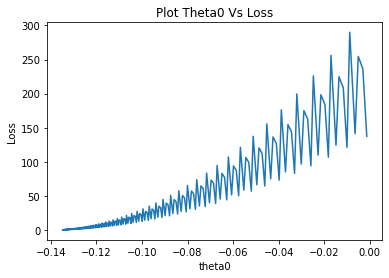

In [18]:
plt.plot(theta0, loss_fun_batch)
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()

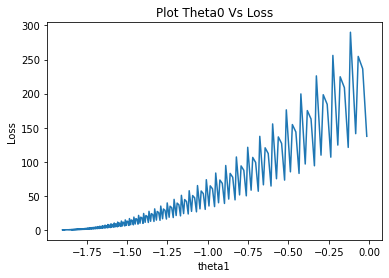

In [19]:
plt.plot(theta1, loss_fun_batch)
plt.xlabel('theta1')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()

### Plot all regression lines till converge

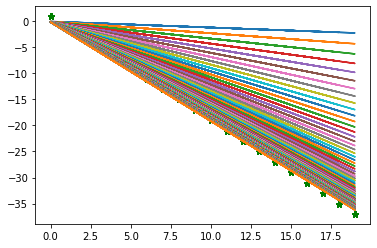

In [20]:
#print(y_predict_list_iteration)
for p_y in y_predict_list_iteration:
  plt.scatter(X, y ,marker= '*', c= 'green')
  plt.plot(X, p_y)
plt.show()

### Plot The Best Regression Line

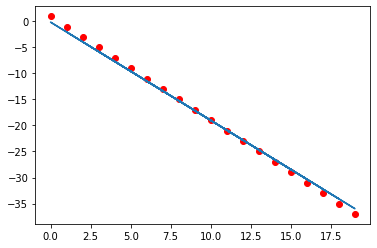

In [21]:
plt.scatter(X, y , c= 'red')
plt.plot(X, yp)
plt.show()

## Stochastic Gradient Descent

In [22]:
# call function of Minibatch gradent Descent  but in this case num_batchs = number of observation for all data
yp_sgd, loss_fun_sgd , theta0_sgd , theta1_sgd , loss_fun_batch_sgd, y_predict_list_iteration_sgd = Mini_Batch(x,y,1000,len(x),0.0001,0.001)
 

Convergence occure at 16 iterations


## R2 Score

In [23]:
print(f"the accuracy of model is = {r2_score(y, yp_sgd)}")

the accuracy of model is = 0.9967981404881295
